In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
# clone YOLOv5
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 8604, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 8604 (delta 192), reused 197 (delta 103), pack-reused 8286
Receiving objects: 100% (8604/8604), 9.58 MiB | 24.00 MiB/s, done.
Resolving deltas: 100% (5934/5934), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output
from utils.google_utils import gdrive_download

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 636 kB 4.4 MB/s 
Setup complete. Using torch 1.9.0+cu102 CPU


In [4]:
cp /content/gdrive/MyDrive/SSS/best.pt /content/yolov5/weights #copy previod best_weight to yolov5

In [5]:
!unzip /content/gdrive/MyDrive/SSS/test.zip -d /content/yolov5/data/images #loading unlabeled data to yolov5

Archive:  /content/gdrive/MyDrive/SSS/test.zip
   creating: /content/yolov5/data/images/test/
  inflating: /content/yolov5/data/images/test/50405819.jpg  
  inflating: /content/yolov5/data/images/test/39371120.jpg  
  inflating: /content/yolov5/data/images/test/48914504.jpg  
  inflating: /content/yolov5/data/images/test/24223070.jpg  
  inflating: /content/yolov5/data/images/test/49563951.jpg  
  inflating: /content/yolov5/data/images/test/38408148.jpg  
  inflating: /content/yolov5/data/images/test/26184492.jpg  
  inflating: /content/yolov5/data/images/test/13573797.jpg  
  inflating: /content/yolov5/data/images/test/52216382.jpg  
  inflating: /content/yolov5/data/images/test/44909413.jpg  
  inflating: /content/yolov5/data/images/test/37879004.jpg  
  inflating: /content/yolov5/data/images/test/58807745.jpg  
  inflating: /content/yolov5/data/images/test/22969705.jpg  
  inflating: /content/yolov5/data/images/test/44912263.jpg  
  inflating: /content/yolov5/data/images/test/379343

In [ ]:
## Open file detec.py and add the label out put in save-txt so that we can get the labels later

In [12]:
#make predict by inference
!python detect.py --weights /content/yolov5/weights/best.pt  --img 416 --conf 0.25 --save-txt --source /content/yolov5/data/images/test/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/yolov5/data/images/test/', update=False, view_img=False, weights=['/content/yolov5/weights/best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 476 layers, 87272713 parameters, 0 gradients, 217.3 GFLOPS
image 1/1504 /content/yolov5/data/images/test/10005791.jpg: 416x416 1 ao-khoac, Done. (1.881s)
image 2/1504 /content/yolov5/data/images/t

In [8]:
#extract the label and id names:
import glob


In [13]:
lst={}
for imageName in glob.glob('/content/yolov5/runs/detect/exp3/labels/*.txt'):
    name=imageName.split('/')
    id=name[-1][:-4]
    with open(imageName,'r') as f:
      content=f.readlines()
      content=set(x.strip() for x in content)
    lst[id]=content
lst

{'48493531': {'bra'},
 '24209670': {'dam'},
 '3715013': {'lot-nam'},
 '31959121': {'ao-dai'},
 '49563635': {'ao-nu'},
 '24897406': {'cosplay'},
 '38416088': {'bra'},
 '46207893': {'dam'},
 '17972259': {'ao-khoac'},
 '20711163': {'ao-khoac'},
 '49251776': {'ao-nu', 'quan-nu'},
 '49695899': {'mask'},
 '42333864': {'ao-khoac', 'quan-nam'},
 '53265704': {'ao-dai', 'quan-nu'},
 '20701377': {'ao-khoac'},
 '55042411': {'ao-nu'},
 '46695130': {'ao-nu', 'dam'},
 '38326779': {'ao-khoac', 'ao-nu', 'bra'},
 '40364407': {'blazer', 'dam'},
 '10169827': {'ao-khoac'},
 '49287394': {'quan-nu'},
 '39320952': {'ao-dai'},
 '38220838': {'ao-nu', 'quan-nu'},
 '10164464': {'ao-khoac'},
 '42594577': {'ao-nu', 'quan-nu'},
 '24742457': {'dam'},
 '56445441': {'bra'},
 '4743243': {'blazer', 'dam'},
 '22253489': {'quan-nu'},
 '42865630': {'ao-nu', 'cosplay'},
 '16280304': {'ao-dai', 'dam'},
 '49563977': {'ao-nu'},
 '31293586': {'ao-dai'},
 '20675748': {'ao-khoac'},
 '9312598': {'ao-khoac'},
 '24792370': {'ao-dai'}

In [14]:
import pandas as pd

In [21]:
df=pd.DataFrame(list(lst.items()),columns=['id','catergory'])

In [22]:
df.head()

,id,catergory
0,48493531,{bra}
1,24209670,{dam}
2,3715013,{lot-nam}
3,31959121,{ao-dai}
4,49563635,{ao-nu}


In [25]:
df.to_csv('Predict_test.csv')
!cp 'Predict_test.csv' /content/gdrive/MyDrive/SSS/

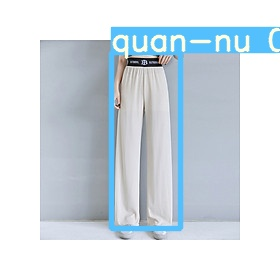

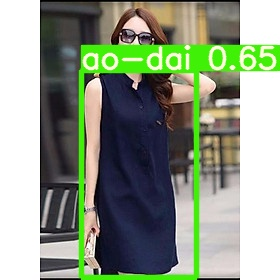

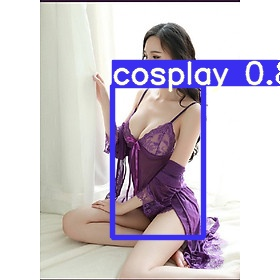

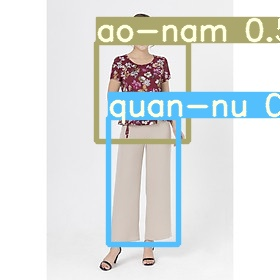

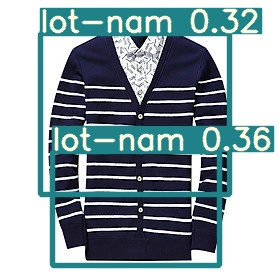

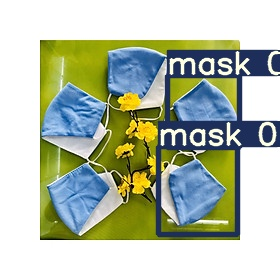

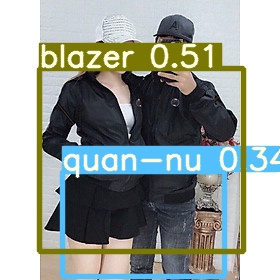

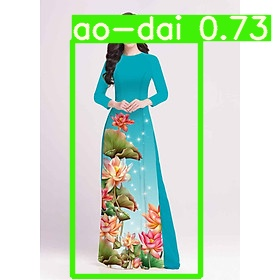

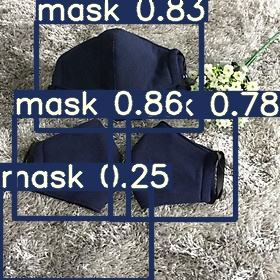

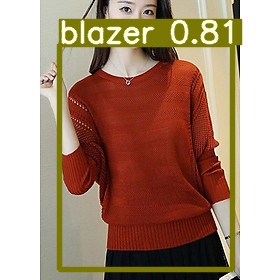

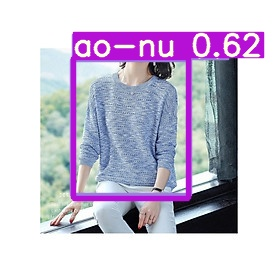

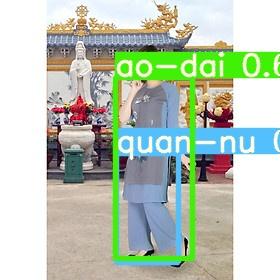

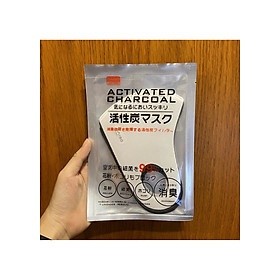

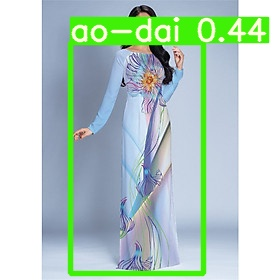

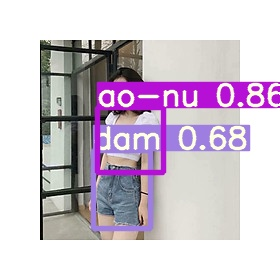

In [28]:
for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg')[15:30]:
  display(Image(filename=imageName))
  print('\n')
